# Nöral networks ile Regresyona Giriş (tensörflow)

Bir regresyon problemi için birçok tanım vardır, bir sayı tahmin etmek.

- Evlerin satış fiyatını tahmin edin, onlar hakkında bilgi verilir (oda sayısı, büyüklük, banyo sayısı gibi).
- Bir görüntüdeki bir öğenin sınırlayıcı kutusunun koordinatlarını tahmin edin.
- Demografileri (yaş, cinsiyet, cinsiyet, ırk) göz önüne alındığında bir birey için sağlık sigortasının maliyetini tahmin edin.

Bu not defterinde, bir girdi örneğini nasıl alabileceğinizin temellerini belirleyeceğiz (bu sizin verilerinizdir), bu girdilerdeki kalıpları keşfetmek için bir sinir ağı oluşturacağız ve ardından bu girdilere dayalı bir tahmin (bir sayı şeklinde) yapacağız.

# Bazı regresyon sorunlarına örnekler;
* Bir evin satış fiyatının tahmin edilmesi.
* Kaç adet insan bu uygulamayı yükler?
* Sigorta bedeli ne kadar olur?
* Bir nesne algılama probleminde kutuların nerede olması gerektiğine dair koordinatları tahmin etmeye çalışmak.
* Güvenlik kamerasının arabaya çarpıp kaçan aracı algılaması.

Regresyon, ilişkiyi tahmin etmek için bir dizi istatistikel süreçtir. Sonuç değişkeni olarak adlandırılan bağımlı bir değişken veya bir veya daha fazla bağımsız değişken arasında, tahmin ediciler, ortak değişkenler veya özellikler olarak adlandırılır.

Ev fiyatını tahmin etmede bağımlı değişken ev fiyatını tahmin etmeye çalışmak, evin fiyatı..Sonuç. Oda banyo sayısı vs bağımsız değişkenlerdir.

# Bu çalışma dosyasının içeriği;

* Bir regresyon modelinin mimarisi
* Giriş şekilleri ve çıkış şekilleri
  * X: özellikler/veriler (girişler)
  * Y: etiketler (çıkışlar)
* Görüntülemek ve sığdırmak için özel veriler oluşturma
* Modellemedeki adımlar
  * Bir model oluşturma
  * Bir model derlemek
    * Bir kayıp fonksiyonu tanımlama
    * Bir optimize edici kurmak
    * Değerlendirme metrikleri oluşturma
  * Bir model takmak (verilerimizdeki kalıpları bulmak)
* Bir modeli değerlendirmek
  * Modeli görselleştirme ("görselleştir, görselleştir, görselleştir")
  * Antrenman eğrilerine bakmak
  * Tahminleri temel gerçekle karşılaştırın (değerlendirme metriklerimizi kullanarak)
* Bir modeli kaydetmek (böylece daha sonra kullanabiliriz)
* Bir model yüklemek

Burada da numerical encoding (one-hot encoding) var, inputs içerisinde örneğin yatak odası sayısı. Input Features olarak adlandırılır. Örneğin yatak odası 2 olanda matriste 0010, 3 olanda 0001 gibi...yatak odası, banyo, mutfak --> shape [3], çıktı 10.000 dolar shape [1]

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb

Hiperparametre Tipik değer

Giriş katmanı: şekli Özellik sayısıyla aynı şekil (örn. # yatak odaları, # banyolar, konut fiyat tahmininde # araba alanları için 3)

Gizli katman(lar): Soruna özel, minimum = 1, maksimum = sınırsız

Gizli katman başına nöronlar: Probleme özgü, genellikle 10 ila 100

Çıktı katmanı şekli: İstenilen tahmin şekli ile aynı şekil (örn. ev fiyatı için 1)

Gizli aktivasyon: Genellikle ReLU (doğrultma doğrusal birim)

Çıkış aktivasyonu: Yok, ReLU, lojistik/tanh

Kayıp fonksiyonu: MSE (ortalama kare hatası) veya MAE (ortalama mutlak hata)/Huber (MAE/MSE kombinasyonu) eğer aykırı öğerlerse

Optimize edici: SGD (stokastik gradyan iniş), Adam

In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.15.0
Notebook last run (end-to-end): 2024-03-05 18:52:49.721292


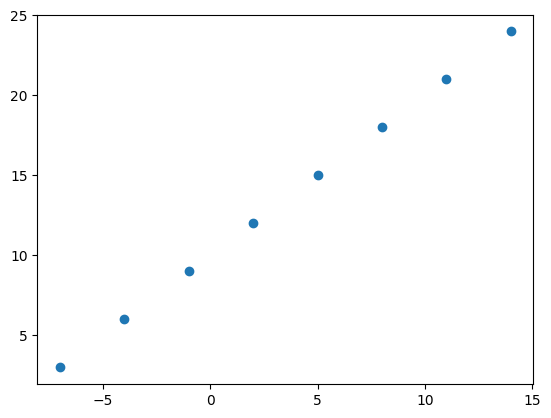

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Make labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Herhangi bir modelleme yapmadan önce, X ve y arasındaki kalıbı hesaplayabilir misiniz?

Örneğin, bu verilere dayanarak size sorduğumu varsayalım, X 17.0 olsaydı y değeri ne olurdu?

Ya da X -10.0 olsaydı ne olur?

Bu tür bir kalıp keşfi, bizim için yapmak üzere sinir ağları oluşturacağımız şeyin özüdür.

Yeni sinir ağırnın öğrenmesi için almaya çalışacağımız ilişkidir y = x+10. Bu, X ve Y'miz arasındaki ilişki veya fonksiyondur. Giriş özellikleri ve etiketler bağımsız değişken ve y de bağımlı değişkendir.

# Regresyon giriş şekilleri ve çıkış şekilleri

Input Shape, giriş şekli, modele giren verilerinizin şeklidir.

Output Shape, çıktı şekli, modelinizden çıkmasını istediğiniz verilerin şeklidir.

Bunlar, üzerinde çalıştığınız soruna bağlı olarak değişecektir.

Sinir ağları, sayıları ve çıktı sayılarını kabul eder. Bu sayılar tipik olarak tensörler (veya diziler) olarak temsil edilir.

Daha önce NumPy dizilerini kullanarak veri oluşturduk, ancak aynısını tensörlerle de yapabilirdik.

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
input_shape_1 = X[0].shape
output_shape_1 = y[0].shape
input_shape_1, output_shape_1, X[0].ndim

((), (), 0)

0'ın şekli yok. Çünkü modelimize ne tür bir veri geçirirsek geçelim, her zaman girdi olarak alacak ve bir tür tensör çıktı olarak geri dönecektir.

Ancak bizim durumumuzda, veri kümemiz nedeniyle (sadece 2 küçük sayı listesi), özel bir tensör türüne, daha spesifik olarak bir sıra 0 tensörüne veya bir skalere bakıyoruz.

Bizim durumumuzda, -7.0'a eşit olan X[0] ile 3.0'a eşit y[0] arasındaki kalıbı tahmin etmek için bir model oluşturmaya çalışıyoruz.

Şimdi cevabımızı alıyoruz, 1 y değerini tahmin etmek için 1 X değeri kullanmaya çalışıyoruz.

Aslında, muhtemelen sinir ağlarıyla çalışırken en çok zaman harcayacağınız şeylerden ikisidir: giriş ve çıkışlarınızın doğru şekilde olduğundan emin olmak.

In [ ]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape

TensorShape([3])

In [ ]:
# Numpy dizilerini tensörlere dönüştür.
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape_1 = X[0].shape
output_shape_1 = y[0].shape
input_shape_1, output_shape_1, X[0].ndim

(TensorShape([]), TensorShape([]), 0)

Boyut yok, skaler bir değer.

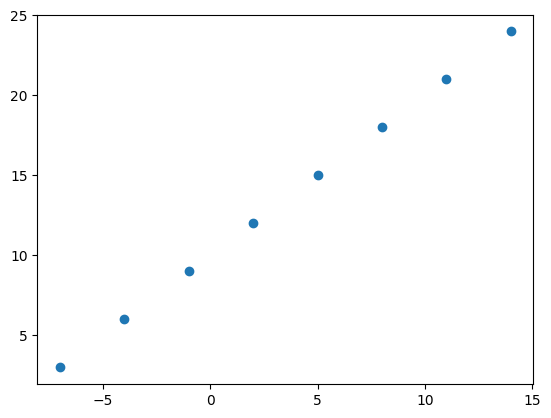

In [ ]:
# Buradaki ilişkiyi anlayacak model nasıl oluşturulur?
plt.scatter(X, y);

# TensorFlow ile modelleme adımları

Artık giriş ve çıkış şekillerinin yanı sıra hangi verilere sahip olduğumuzu biliyoruz, onu modellemek için nasıl bir sinir ağı oluşturacağımızı görelim.

TensorFlow'da, bir model oluşturmak ve eğitmek için tipik olarak 3 temel adım vardır.

* Bir model oluşturma (Making a model) - bir sinir ağının katmanlarını kendiniz (İşlevsel veya Sıralı API'yi kullanarak) bir araya getirin veya önceden oluşturulmuş bir modeli içe aktarın (aktarım öğrenmesi olarak bilinir).
* Bir modelin derlenmesi (Compiling a model) - bir modelin performansının nasıl ölçülmesi gerektiğini (kayıp/metrik) tanımlamanın yanı sıra nasıl iyileştirilmesi gerektiğini (optimize edici) tanımlama.
  - Model ne kadar yanlış? sorusuna cevap.
  - Kalıpların nasıl iyileştirileceği modellenir. Öğrenme ve değerlendirme metrikleridir.
* Bir model takmak (Fitting a model) - modelin verilerdeki kalıpları bulmaya çalışmasına izin vermek (X y'ye nasıl ulaşır). Özellikler veya etiketler.

Regresyon verilerimiz için bir model oluşturmak üzere Keras Sequential API'yi kullanarak bunları çalışırken görelim. Ve sonra her birine adım atacağız.

 ### Note: TensorFlow 2.7.0+ kullanıyorsanız, fit() işlevi artık (batch_size, )'den (batch_size, 1)'e gitmek için giriş verilerini yükseltmiyor. Bunu düzeltmek için, tf.expand_dims(input_data, axis=-1) kullanarak giriş verilerinin boyutunu genişletmeniz gerekir.

### Bizim durumumuzda bu, model.fit(X, y, epochs=5) kullanmak yerine model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) kullanmak anlamına gelir.

* https://www.tensorflow.org/guide/keras/functional_api
* https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
* https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0 (tf.2.7 notları)
* https://keras.io/

- Get the data ready (turn into tensors)
- Tensorflow Hub, Build of pick a pretrained model to suit your model (Veriler yoğunlaştığında soruna uyacak şekilde önceden eğitilmiş bir model oluştur veya seç)
- Fit the model to the data and make a prediction
- Evaluate the model
- Improve through experimantation
Save and reload your trained model

model = tf.keras.Sequential([....--> Bir model oluştur ve sıralı (sequential) olsun dedik.

Dense 1 oldu çünkü Bir sayı girişi almak ve bir sayıyı tahmin etmek için kullanacağız.

Ortalama mutlak hata --> etiketler ve tahminler arasındaki mutlak hatayı hesaplar.

SGD --> Bir optimize edicinin sinir apına nasıl iyileştirilmesi gerektiğini söylemesidir.

epoch ile 5 kere verileri gözden geçir diyeceğiz. 100 deseydik daha uzun vakit alırdı.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Make a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 456ms/step - loss: 20.3132 - mae: 20.3132
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 20.0320 - mae: 20.0320
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 19.7507 - mae: 19.7507
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 19.4695 - mae: 19.4695
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 19.1882 - mae: 19.1882


X ve y arasındaki kalıpları bulmak için bir model eğittik.

In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

Modelimizi 17.0 X değerini geçersek sonucun ne olmalı?

In [ ]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[-19.990376]], dtype=float32)

Soru: Keras nedir? TensorFlow ile çalıştığımızı sanıyordum ama TensorFlow kodunu her yazdığımızda, keras tf'den sonra geliyor (örn. tf.keras.layers.Dense())?

TensorFlow 2.0+'dan önce Keras, derin öğrenme modellerini kolaylıkla oluşturabilmek için tasarlanmış bir API'ydi. TensorFlow 2.0+'dan bu yana, işlevselliği TensorFlow kitaplığına sıkı bir şekilde entegre edilmiştir.

# Modeli Geliştirme

Modelimizi geliştirmek için, daha önce attığımız 3 adımın neredeyse her bölümünü değiştiriyoruz.

* Bir model oluşturma - burada daha fazla katman eklemek, her katman içindeki gizli birimlerin (nöronlar olarak da adlandırılır) sayısını artırmak, her katmanın aktivasyon işlevlerini değiştirmek isteyebilirsiniz.
* Bir model derleme - optimizasyon işlevini seçmek veya belki de optimizasyon işlevinin öğrenme oranını değiştirmek isteyebilirsiniz.
* Bir model takmak - belki daha fazla dönem için bir model sığdırabilirsiniz (eğitimi daha uzun süre bırakın) veya daha fazla veri üzerinde (modele öğrenmek için daha fazla örnek verin).

https://en.wikipedia.org/wiki/Hyperparameter_optimization

# Common ways to improve a deep model:
* Adding **layers**
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change the learning rate
(because you can alter each of
* Fitting on more data
these, they're hyperparameters)
* Fitting for longer

Bir sinir ağını potansiyel olarak iyileştirmenin birçok farklı yolu vardır. En yaygın olanlardan bazıları şunlardır: katman sayısını artırmak (ağı daha derin hale getirmek), gizli birimlerin sayısını artırmak (ağı daha geniş hale getirmek) ve öğrenme oranını değiştirmek. Bu değerlerin hepsi insan-değiştirilebilir olduğundan, hiperparametreler olarak adlandırılırlar) ve en iyi hiperparametreleri bulmaya çalışma uygulamasına hiperparametre ayarlaması denir.

Adam optimize edici, yaygın ve kullanışlı bir optimizasyon aracıdır. Yani SGD yerine Adam(lr = 0.001) yazabilirdin. Öğrenme oranı yüksekse iyi tahmin eder.



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 20.5126 - mae: 20.5126
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 20.2313 - mae: 20.2313
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 19.9501 - mae: 19.9501
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 19.6688 - mae: 19.6688
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 19.3876 - mae: 19.3876
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 19.1063 - mae: 19.1063
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 18.8251 - mae: 18.8251
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 18.5438 - mae: 18.5438
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 18.2626 - mae: 18.2626
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 17.9813 - mae: 17.9813
Epoch 11/100
1/1 [==============================] - 0s 

Kayıp değerinin daha önce düştüğünü fark etmiş olabilirsiniz (ve çağ sayısı arttıkça azalmaya devam edin).

Modelimizle bir tahmin yaptığımızda bunun ne anlama geldiğini düşünüyorsunuz?

In [ ]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 75ms/step


array([[29.609007]], dtype=float32)

In [ ]:
# Yeni deneme
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.8203 - mae: 13.8203
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.5359 - mae: 13.5359
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.2716 - mae: 13.2716
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0230 - mae: 13.0230
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7944 - mae: 12.7944
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5836 - mae: 12.5836
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 12.3712 - mae: 12.3712
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1520 - mae: 12.1520
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9356 - mae: 11.9356
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7110 - mae: 11.7110
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 79ms/step


array([[31.038818]], dtype=float32)

* Tüm parametreler modelin iyileşmesine yol açmayabilir.
* Activation None diyebilirdik.
* Sadece Adam() yazabilirdin.

# Evaluating a model

Sinir ağları oluştururken yaşayacağınız tipik bir iş akışı:

Bir model oluşturun -> değerlendirin -> bir model oluşturun (ince ayarlayın) -> değerlendirin -> bir model oluşturun (ince ayar yapın) -> değerlendirin...

İnce ayar, belki de sıfırdan bir model oluşturmaktan değil, mevcut bir modeli ayarlamaktan gelir.

# Görselleştir, görselleştir, görselleştir

Değerlendirme söz konusu olduğunda, şu kelimeleri hatırlamak isteyeceksiniz: "görselleştir, görselleştir, görselleştir."

Bunun nedeni, muhtemelen bir şeye bakmak (yapmak) hakkında düşünmekten daha iyidir.

**Görselleştirmek** iyi bir fikirdir:
* Veriler - hangi verilerle çalışıyorsunuz? Neye benziyor?
* Modelin kendisi - mimari neye benziyor? Farklı şekiller nelerdir?
* Bir modelin eğitimi - bir model öğrenirken nasıl performans gösterir?
* Bir modelin tahminleri - bir modelin tahminleri temel gerçeğe (orijinal etiketler) karşı nasıl hizadadır?

Modeli görselleştirerek başlayalım.

Ama önce, biraz daha büyük bir veri kümesi ve kullanabileceğimiz yeni bir model oluşturacağız (eskisi gibi olacak, ancak ne kadar çok pratik o kadar iyi).

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = tf.range(-90, 110, 4)
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

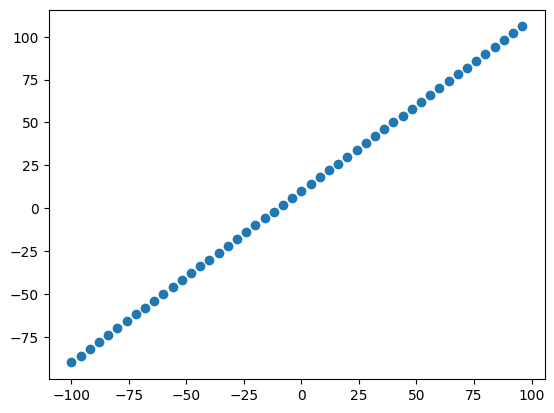

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

# y = x + 10 oldu..

# Verileri eğitim/test setine bölün

Bir makine öğrenimi projesindeki diğer en yaygın ve önemli adımlardan biri, bir eğitim ve test seti (ve gerektiğinde bir doğrulama seti) oluşturmaktır.

Her set belirli bir amaca hizmet eder:
* Eğitim seti - model, mevcut toplam verilerin tipik olarak %70-80'i olan bu verilerden öğrenir (dönem boyunca çalıştığınız ders materyalleri gibi).
* Doğrulama seti - model, genellikle mevcut toplam verilerin %10-15'i olan (final sınavından önce girdiğiniz uygulama sınavı gibi) bu verilere göre ayarlanır.
* Test seti - model, öğrendiklerini test etmek için bu veriler üzerinde değerlendirilir, tipik olarak mevcut toplam verilerin %10-15'idir (dönem sonunda girdiğiniz final sınavı gibi).

Şimdilik sadece bir eğitim ve test seti kullanacağız, bu da modelimizin öğrenmesi ve değerlendirilmesi için bir veri kümemiz olacağı anlamına geliyor.

X ve y dizilerimizi bölerek bunları oluşturabiliriz.

**Not: Gerçek dünya verileriyle uğraşırken, bu adım genellikle bir projenin başlangıcında yapılır (test seti her zaman diğer tüm verilerden ayrı tutulmalıdır). Modelimizin eğitim verileri üzerinde öğrenmesini ve daha sonra görünmeyen örneklere ne kadar iyi genellediğine dair bir gösterge almak için test verileri üzerinde değerlendirmesini istiyoruz.**

Okulda okuduğunu düşün.
- Kurs materyallerin (training set)
- practice exam (validation set), dönem boyunca öğrendiğin şeyler.  
- final exam (test set), dönem boyunca öğrendiğin bilgileri değerlendirme için sınav.

ML modelinden beklenilen görmediği veriler üzerinde iyi performans göstermesidir. Kalıpları öğrenmesini isteriz.

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

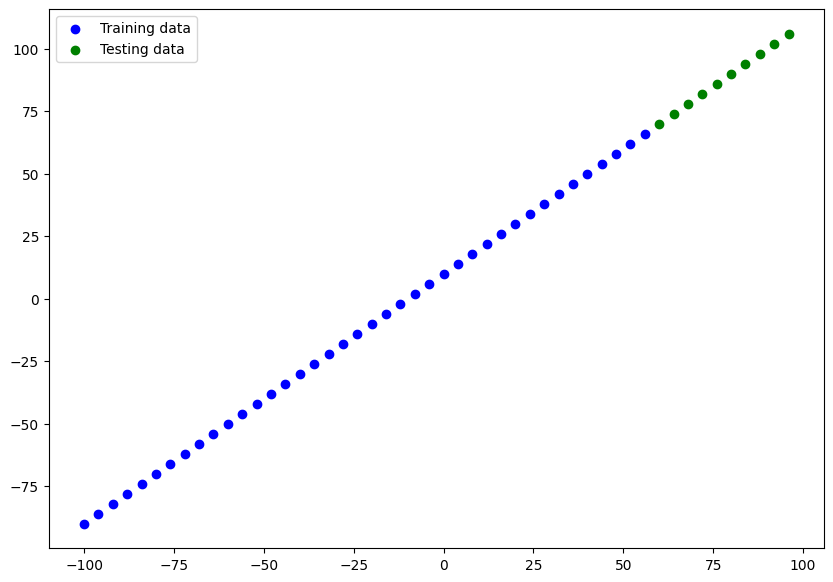

In [ ]:
plt.figure(figsize=(10, 7)) #tablo alanını ayarladık)
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

Verilerinizi, modelinizi, herhangi bir şeyinizi ne zaman görselleştirebilseniz, bu iyi bir fikirdir.

Bu grafiği göz önünde bulundurarak, yapmaya çalışacağımız şey, yeşil noktaları (X_test) çizmek için mavi noktalardaki (X_train) deseni öğrenen bir model oluşturmaktır.

Bir model oluşturma zamanı. Daha öncekinin aynısını yapacağız (daha uzun süre eğittiğimiz).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)



# Modeli görselleştirmek

Bir model oluşturduktan sonra, ona bir göz atmak isteyebilirsiniz (özellikle daha önce çok fazla yapmadıysanız).

Üzerinde summary() çağırarak modelinizin katmanlarına ve şekillerine bakabilirsiniz.

🔑 Not: Bir modeli görselleştirmek, giriş ve çıkış şekli uyumsuzluklarıyla karşılaştığınızda özellikle yararlıdır.

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb

In [ ]:
# Doesn't work (model not fit/built)
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

Modelimizi sığdırmadığımız veya inşa etmediğimiz için hataların üzerindeki hücre.

Ayrıca hangi girdi şeklini beklemesi gerektiğini de söylemedik.

Yukarıda, giriş şeklinin sadece bir sayı olduğunu nasıl tartıştığımızı hatırlıyor musunuz?

İlk katmana input_shape parametresini kullanarak modelimizin verilerimizin giriş şeklini bilmesini sağlayabiliriz (genellikle input_shape tanımlanmamışsa, Keras bunu otomatik olarak anlamaya çalışır).

Ağlar giriş şeklini kendi başına çözebilir ama bazen üzerinde çalıştığın soruna göre manuel tanımlaman gerekir.

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

Giriş şekli bir, çünkü onu bir sayı geçeriz.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Modelimizde summary() çağrısı bize içerdiği katmanları, çıktı şeklini ve parametre sayısını gösterir.

Toplam paramlar - modeldeki toplam parametre sayısı.

Eğitilebilir parametreler - bunlar, modelin eğitilirken güncelleyebileceği parametrelerdir (desenler).

Eğitilemez parametreler - bu parametreler eğitim sırasında güncellenmez (bu, transfer öğrenimi sırasında diğer modellerden zaten öğrenilmiş kalıpları getirdiğinizde tipiktir).

📖 Kaynak: Bir katman içindeki eğitilebilir parametrelere daha derinlemesine bir genel bakış için MIT'nin derin öğrenme videosuna girişine göz atın.

https://www.youtube.com/watch?v=njKP3FqW3Sk

Şimdilik, bu parametreler hakkında düşünmeniz gereken tek şey, verilerdeki öğrenilebilir kalıplarıdır.

Modelimizi eğitim verilerine sığdıralım.

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1) # verbose controls how much gets output


Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 50.2274 - mae: 50.2274
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 17.4606 - mae: 17.4606
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 16.7208 - mae: 16.7208
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0140 - mae: 9.0140
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1086 - mae: 11.1086
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2599 - mae: 10.2599
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2655 - mae: 9.2655
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.1832 - mae: 9.1832
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8207 - mae: 11.8207
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 13.7535 - mae: 13.7535
Epoch 11/100
2/2 [==============================] - 0s 7ms/step

verbose 0 dersen herhangi bir çıktı almazsın.

Dense'yi arttırarak dene, farklı rakamlar elde edebilirsin.

In [ ]:
# Check the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Özetin yanı sıra, plot_model() kullanarak modelin 2D grafiğini de görüntüleyebilirsiniz.

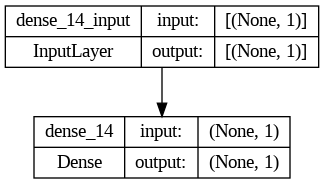

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

Bizim durumumuzda, kullandığımız modelin yalnızca bir girdi ve bir çıkışı var, ancak daha karmaşık modelleri görselleştirmek hata ayıklama için çok yardımcı olabilir.

Şekil 1 ve çıkış şekli 10 çünkü yoğun katmanda 10 gizli birim var.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
  # define the input_shape to our model
  tf.keras.layers.Dense(1, name = "output_layer")
], name = "model_1")

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# Check the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


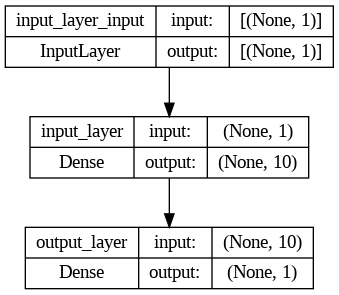

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

Kendi modeline gizli katmanlar ekleyebilirsin, verileri sığdur ve özet al. Eğitilebilir parametetrelerin sayısını al.

# Tahminleri görselleştirmek

Artık eğitimli bir modelimiz var, bazı tahminleri görselleştirelim.

Tahminleri görselleştirmek için, onları temel gerçek etiketlerine karşı çizmek her zaman iyi bir fikirdir.

Genellikle bunu y_test vs. y_pred (zemin gerçeği ve tahminler) şeklinde görürsünüz.

İlk olarak, test verileri (X_test) hakkında bazı tahminlerde bulunacağız, modelin test verilerini hiç görmediğini unutmayın.

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 59ms/step


In [ ]:
# View the predictions
y_preds

array([[13.417726 ],
       [14.3122425],
       [15.2067585],
       [16.101274 ],
       [16.995787 ],
       [17.890303 ],
       [18.784817 ],
       [19.679333 ],
       [20.573845 ],
       [21.468369 ]], dtype=float32)

Model verileri mükemmel şekilde öğrendiyse ve test veri setini %100 tahmin edebildiyse bu sayılar bu sayılarla aynı hizada olur. Tek tek gözden geçirmek yerine görselleştir.

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

Tamam, bir sayı listesi alıyoruz ama bunlar temel doğruluk etiketleriyle nasıl karşılaştırılır?

Öğrenmek için bir çizim işlevi oluşturalım.

Not: Bir şeyi çok görselleştireceğinizi düşünüyorsanız, daha sonra kullanabilmeniz için onu işlevlendirmek iyi bir fikirdir.

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

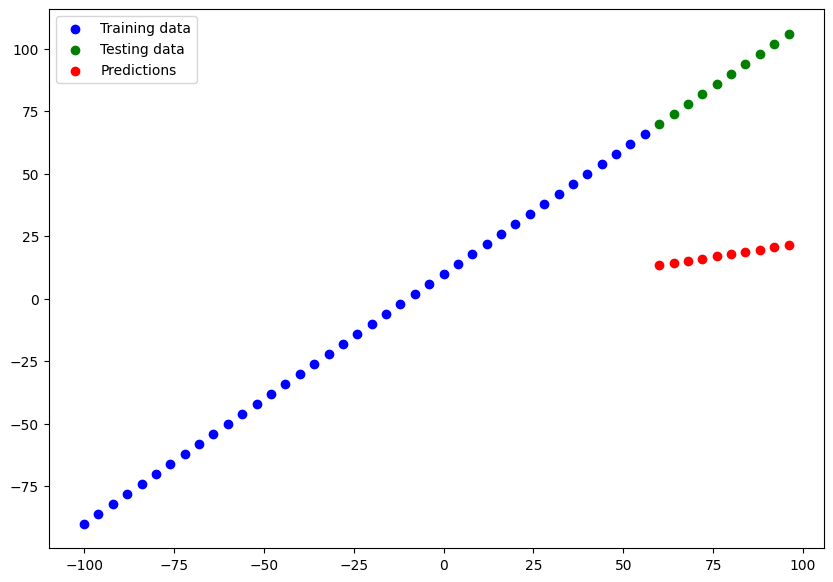

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

Arsadan tahminlerimizin tamamen tuhav olmadığını görebiliriz ama kesinlikle özel bir şey de değiller.

# Tahminleri değerlendirme

Görselleştirmelerin yanı sıra, değerlendirme metrikleri, modelinizi değerlendirmek için alternatif en iyi seçeneğinizdir.

Üzerinde çalıştığınız soruna bağlı olarak, farklı modellerin farklı değerlendirme metrikleri vardır.

Regresyon problemleri için kullanılan ana metriklerden ikisi şunlardır:
* Ortalama mutlak hata (MAE) - tahminlerin her biri arasındaki ortalama fark.
* Ortalama kare hata (MSE) - tahminler arasındaki kare ortalama fark (daha büyük hatalar küçük hatalardan daha zararlıysa kullanın).

Bu değerlerin her biri ne kadar düşükse o kadar iyidir.

Ayrıca, derleme adımı sırasında herhangi bir metrik kurulumunun yanı sıra modelin kaybını döndürecek olan model.evaluate() kullanabilirsiniz.


In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 261ms/step - loss: 70.5570 - mae: 70.5570


[70.55696105957031, 70.55696105957031]

Bizim durumumuzda, kayıp fonksiyonu için MAE ve metrikler için MAE kullandığımız için, model.evaulate() ikisini de döndürür.

TensorFlow ayrıca MSE ve MAE için yerleşik işlevlere sahiptir.

Birçok değerlendirme işlevi için öncül aynıdır: tahminleri temel doğruluk etiketleriyle karşılaştırın.

Üzerinde çalıştığın sorunlara bağlı olarak değerlendirme metriklerini ayarla.

MAE -->
- Herhangi bir regresyon modelinde kullanılabilir.
- tf.keras.losses.MAE()
- tf.metrics.mean_absolute_error

MSE -->
- Daha büyük hataların küçük hatalardan daha önemli oldukları durumda.
- tf.keras.losses.MSE()
- tf.metrics.mean_square_error

Huber -->
- Aykırı değişimlere karşı MSE'den daha az duyarlı.
- MSE ve MAE birleşimi.
- tf.keras.losses.Huber()

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([74.582275, 73.68776 , 72.79324 , 71.89873 , 71.00421 , 70.109695,
       69.21518 , 68.32066 , 67.426155, 66.53163 ], dtype=float32)>

MAE tek bir çıktı olmalıdır.

Bunun yerine 10 değer elde ediyoruz.

Bunun nedeni, y_test ve y_preds tensörlerimizin farklı şekiller olmasıdır.

In [ ]:
# Check the test label tensor values
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[13.417726 ],
       [14.3122425],
       [15.2067585],
       [16.101274 ],
       [16.995787 ],
       [17.890303 ],
       [18.784817 ],
       [19.679333 ],
       [20.573845 ],
       [21.468369 ]], dtype=float32)

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.shape

(TensorShape([10]), (10, 1))

Farklı girdi ve çıkış şekilleriyle nasıl başa çıkmayı tartıştığımızı unutmayın, karşılaşacağınız en yaygın sorunlardan biridir, bu o zamanlardan biridir.

Squeeze() kullanarak düzeltebiliriz, 1 boyutunu y_preds tensörümüzden kaldırarak y_test ile aynı şekil haline getirir.

🔑 Not: İki tensörü karşılaştırıyorsanız, doğru şekil(ler) olduklarından emin olmak önemlidir (şekilleri her zaman manipüle etmek zorunda kalmayacaksınız, ancak her zaman dikkat edin, birçok hata uyumsuz tensörlerin, özellikle uyumsuz giriş ve çıkış şekillerinin sonucudur).

In [ ]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [ ]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

(10,1) 1'i kaldırmak için sequeeze..

şekil uyumu çok önemli.

In [ ]:
# What do they look like?
y_test, y_preds.squeeze()

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([13.417726 , 14.3122425, 15.2067585, 16.101274 , 16.995787 ,
        17.890303 , 18.784817 , 19.679333 , 20.573845 , 21.468369 ],
       dtype=float32))

Y_test ve y_preds tenorlarımızı nasıl aynı şekilde yapacağımızı biliyoruz, hadi değerlendirme metriklerimizi kullanalım.

In [ ]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=70.55696>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5057.847>

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=int32, numpy=71>

Yine, tekrar kullanabileceğinizi düşündüğünüz her şeyi işlevsel hale getirmek (veya kendinizi tekrar tekrar kullanırken bulmak) iyi bir fikirdir.

Değerlendirme metriklerimiz için işlevler yapalım.

İleride kullanabilmek amaçlı fonksiyon yazıldı.

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# Bir modeli geliştirmek için deneyler yürütmek

Modelinizin yaptığı değerlendirme metriklerini ve tahminleri gördükten sonra, muhtemelen onu geliştirmek isteyeceksiniz.

Yine, bunu yapmanın birçok farklı yolu var, ancak ana olanlardan 3'ü:
- Daha fazla veri alın - eğitim almak için modeliniz için daha fazla örnek alın (örüntüleri öğrenmek için daha fazla fırsat).
- Modelinizi büyütün (daha karmaşık bir model kullanın) - bu, her katmanda daha fazla katman veya daha fazla gizli birim şeklinde gelebilir.
- Daha uzun süre antrenman yapın - modelinize verilerdeki kalıpları bulma şansı verin.

Veri kümemizi oluşturduğumuzdan beri, kolayca daha fazla veri yapabiliriz, ancak gerçek dünya veri kümeleriyle çalışırken durum her zaman böyle değildir.

Öyleyse 2 ve 3 kullanarak modelimizi nasıl geliştirebileceğimize bir göz atalım.

Bunu yapmak için 3 model oluşturacağız ve sonuçlarını karşılaştıracağız:
- Model_1 - orijinal modelle aynı, 1 katman, 100 dönem için eğitilmiş.
- Model_2 - 2 katman, 100 dönem için eğitilmiş.
- Model_3 - 2 katman, 500 dönem için eğitilmiş.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 23ms/step - loss: 68.7679 - mae: 68.7679
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 33.5883 - mae: 33.5883
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 9.3430 - mae: 9.3430
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3772 - mae: 11.3772
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 12.6439 - mae: 12.6439
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7827 - mae: 9.7827
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8675 - mae: 8.8675
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0868 - mae: 9.0868
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.4611 - mae: 19.4611
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5219 - mae: 10.5219
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 79ms/step


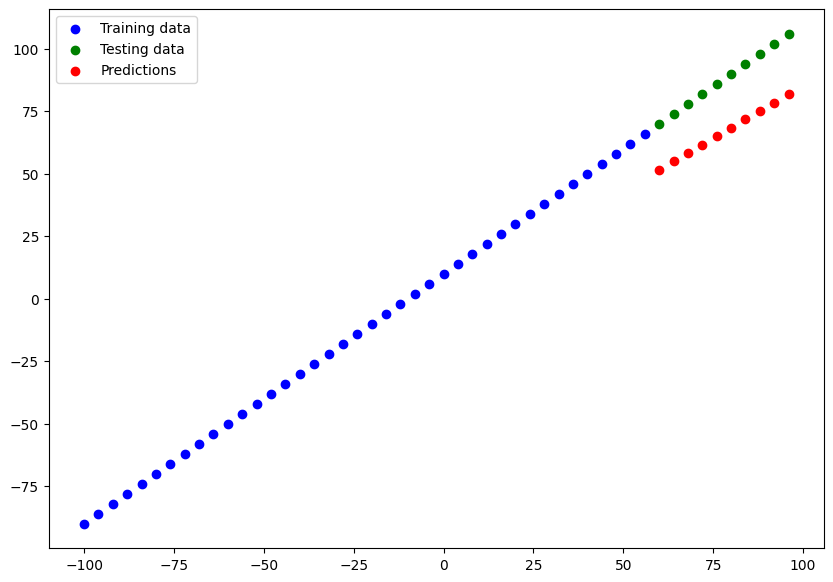

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(21.27638, 456.11493)

sequeeze yapmazsan ilginç bir tablo çıkar. Uygun şekle sokmalısın. Bir şekil yutar.

numpy formatı ile tek rakam çıktı.

# Model_2 oluştur

Bu sefer her şeyi aynı tutarken ekstra yoğun bir katman (böylece şimdi modelimiz 2 katmana sahip olacak) ekleyeceğiz.

tf.random.set_seed(42) --> tekrarlanabilirlik.

dense 100 deseydin 100 nöronlu...


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 242ms/step


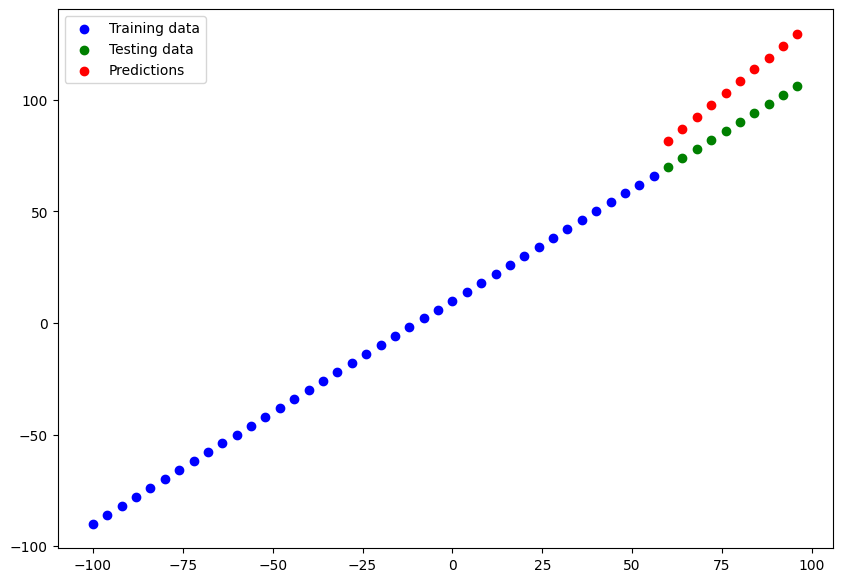

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(17.58685, 323.80444)

# Model_3 oluştur

3. modelimiz için her şeyi model_2 ile aynı tutacağız, ancak bu sefer daha uzun süre antrenman yapacağız (100 yerine 500 dönem).

Bu, modelimize verilerdeki kalıpları öğrenmek için daha fazla şans verecektir.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output



İnce ayar önemli. Modelin hiper parametreleri ile ayar önemli.

Yeşil ile model eğitim verilerini çok iyi öğrendi, genellemedi.

1/1 [==============================] - 0s 61ms/step


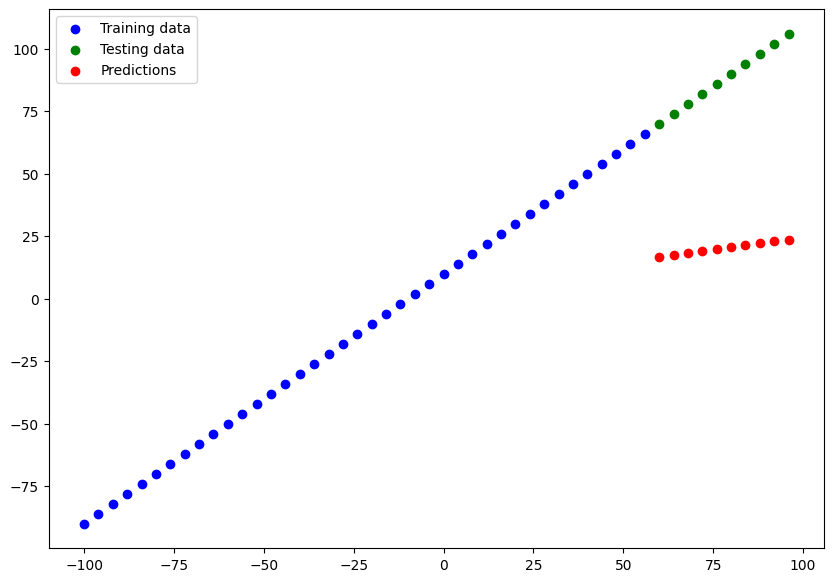

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Garip, daha uzun süre antrenman yaptık ama modelimiz daha mı kötü performans gösterdi?

Görünüşe göre, modelimiz çok uzun süre antrenman yapmış olabilir ve bu nedenle daha kötü sonuçlarla sonuçlandı (daha sonra eğitimi çok uzun süre önlemenin yollarını göreceğiz).

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.886116, 4693.04)

# Sonuçları karşılaştırma

Şimdi 3 benzer ama biraz farklı sonuç için sonuçlarımız var, onları karşılaştıralım.

- Deneyler yapılırken küçük başlanır, karmaşıklık git gide arttırılır.
- .numpy demediğinde dağınık bir rakam çıkar. Yazdığında sadece rakam çıktısı alırsın.
- Deneyler ile ilgili neyin işe yaradığını neyin yaramadığını bilmelisin. Deney sonuçlarını izlemek önemli.
- Model2 en iyisi.

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.276381,456.114929
1,model_2,17.586849,323.804443
2,model_3,67.886116,67.886116


Deneylerimizden, model_2 en iyi performansı göstermiş gibi görünüyor.

Ve şimdi, "vay canına, modelleri karşılaştırmak sıkıcı..." diye düşünüyor olabilirsiniz ve kesinlikle olabilir, burada sadece 3 modeli karşılaştırdık.

Ancak bu, birçok farklı model kombinasyonunu denemek ve hangisinin en iyi performansı gösterdiğini görmek, makine öğrenimi modellemenin neyle ilgili olduğunun bir parçasıdır.

Oluşturduğunuz her model küçük bir deneydir.

🔑 Not: Ana hedeflerinizden biri, deneyleriniz arasındaki süreyi en aza indirmek olmalıdır. Ne kadar çok deney yaparsanız, işe yaramayan şeyleri o kadar çok anlarsınız ve sırayla neyin işe yaradığını anlamaya daha da yaklaşırsınız. Makine öğrenimi uygulayıcısının sloganını hatırlayın: "deney, deney, deney".

Bulacağınız başka bir şey de, işe yarayabileceğini düşündüğünüz şeyin (bir modeli daha uzun süre eğitmek gibi) her zaman işe yaramayabileceğidir ve tam tersi de genellikle böyledir.

# Deneylerinizi takip etmek

Hangisinin diğerlerinden daha iyi performans gösterdiğini görmek için gerçekten iyi bir alışkanlık, modelleme deneylerinizi takip etmektir.

Yukarıdakinin basit bir versiyonunu yaptık (sonuçları farklı değişkenlerde tutarak).

📖 Kaynak: Ancak daha fazla model oluşturdukça, aşağıdakiler gibi araçları kullanmaya bakmak isteyeceksiniz:

- TensorBoard - modelleme deneylerini izlemeye yardımcı olmak için TensorFlow kitaplığının bir bileşeni (bunu daha sonra göreceğiz).
- Ağırlıklar ve Önyargılar - her türlü makine öğrenimi deneyini izlemek için bir araç (Ağırlıklar ve Önyargılar için iyi haber, TensorBoard'a takılmasıdır).

https://tensorboard.dev/

https://wandb.ai/site/

# Bir modeli kaydetmek

Bir modeli eğittikten ve beğeninize göre performans gösteren bir model bulduktan sonra, muhtemelen başka bir yerde (bir web uygulaması veya mobil cihaz gibi) kullanmak üzere kaydetmek isteyeceksiniz.

Model.save() kullanarak bir TensorFlow/Keras modelini kaydedebilirsiniz.

Bir modeli TensorFlow'da kaydetmenin iki yolu vardır:

SavedModel formatı (varsayılan).

HDF5 formatı.

İkisi arasındaki temel fark, SavedModel'in modeli tekrar yüklerken ek değişiklikler yapmadan özel nesneleri (özel katmanlar gibi) otomatik olarak kaydedebilmesidir.

Hangisini kullanmalısınız?

Durumunuza bağlı, ancak SavedModel formatı çoğu zaman yeterli olacaktır.

Her iki yöntem de aynı yöntem çağrısını kullanır.

https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr#savedmodel_format

https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr#hdf5_format

Kaydedilen modeller dosya sekmesinde görünür.

Optimize edicinin durumu, eğitime tam olarak kaldığınız yerden devam etmenize olanak tanır.

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


Şimdi modeli HDF5 formatında kaydedelim, aynı yöntemi ancak farklı bir dosya adıyla kullanacağız.

In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


hdf5 --> Büyük miktarda veriyi depolamak ve düzenlemek için tasarlanmış kullanım.

# Bir model yükleniyor

Load_model() yöntemini kullanarak kaydedilmiş bir modeli yükleyebiliriz.

Farklı biçimler (SavedModel ve HDF5) için bir model yüklemek aynıdır (belirli formatların yol adları doğru olduğu sürece).

Daha önce yüklediğin modelin yolunu kopyalayarak tırnak işareti içinde yapıştır.

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 49ms/step


True

HDF5'ten yükleme hemen hemen aynı.

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 114ms/step


True

# Bir model indirme (Google Colab'dan)

Modelinizi Google Colab'dan yerel makinenize almak istediğinizi varsayın, aşağıdaki şeylerden birini yapabilirsiniz:

Dosyalar bölmesindeki dosyaya sağ tıklayın ve 'indir'e tıklayın.

Aşağıdaki kodu kullanın.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Daha büyük bir örnek

Pekala, TensorFlow'da sinir ağı regresyon modelleri oluşturmanın temellerini gördük.

Bir çentik yükseltelim ve daha fazla özellik açısından zengin bir veri kümesi için bir model oluşturalım.

Daha spesifik olarak, yaş, cinsiyet, bmi, çocuklar, sigara içme durumu ve konut_bölgesi gibi bir dizi farklı parametreye dayanarak bireyler için sağlık sigortasının maliyetini tahmin etmeye çalışacağız.

Bunu yapmak için, Kaggle'da bulunan ve GitHub'da barındırılan kamuya açık olarak mevcut Tıbbi Maliyet veri kümesinden yararlanacağız.

🔑 Not: Makine öğrenimi paradigmalarını öğrenirken, genellikle bir dizi temel teknikten geçer ve ardından açık kaynaklı veri kümeleri ve örneklerle çalışarak bunları uygularsınız. Tıpkı şimdi yaptığımız gibi, temelleri öğrenin, onları farklı problemlerle çalıştırın. Yeni bir şey üzerinde her çalıştığınızda, probleminizin yerine X yerine "Python/TensorFlow ile X problemi örneği" gibi bir şey aramak iyi bir fikirdir.

https://www.kaggle.com/datasets/mirichoi0218/insurance

https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Sayısal olmayan sütunları sayılara dönüştürmek zorunda kalacağız (çünkü bir sinir ağı -sayısal olmayan girdileri işleyemez).

Bunu yapmak için, pandalarda get_dummies() yöntemini kullanacağız.

Kategorik değişkenleri (cinsiyet, sigara içen ve bölge sütunları gibi) one-hot kodlaması kullanarak sayısal değişkenlere dönüştürür.

Kategorik değerleri sayısal değerlere dönüştürmek için one_hot yöntemi kullanılır.

In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Şimdi verileri özelliklere (X) ve etiketlere (y) böleceğiz.

In [ ]:
# Make X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


Ve eğitim ve test setleri oluşturun. Bunu manuel olarak yapabiliriz, ancak kolaylaştırmak için Scikit-Learn'de mevcut olan train_test_split işlevinden yararlanacağız.

* Model seçimi, hatırlama, eğitim ve test seti oluşturmada kullanışlı.
* %80 eğitim verileri, %20 test verileri...
* Bu koddan sonra X_train dersen sıralamanın rastgele karıştırıldığını görürsün.

In [ ]:
# Make training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits



Şimdi bir model oluşturup sığdırabiliriz (model_2 ile aynısını yapacağız).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8781.4443 - mae: 8781.4443
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7875.4102 - mae: 7875.4102
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7597.8535 - mae: 7597.8535
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7677.7568 - mae: 7677.7568
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7678.0205 - mae: 7678.0205
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7603.2842 - mae: 7603.2842
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7572.8975 - mae: 7572.8975
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7781.7246 - mae: 7781.7246
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7430.0522 - mae: 7430.0522
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7711.3076 - mae: 7711.3076

In [ ]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7205.1694 - mae: 7205.1694


[7205.16943359375, 7205.16943359375]

Bu ortalama modelin yaklaşık 7000 kadar yanlış olduğunu gösrterdi.

y_train.median(), y_train.mean() kontrol et. (9000 küsür, 13000 küsür)

Modelimiz çok iyi performans göstermedi, daha büyük bir model deneyelim.

3 şey deneyeceğiz:
- Katman sayısını artırmak (2 -> 3).
- Her katmandaki birim sayısını artırmak (çıkış katmanı hariç).
- Optimize ediciyi değiştirme (SGD'den Adam'a).

Diğer her şey aynı kalacak.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

verbose = 1 dersen epoch sayılarını çıktılarını görürsün

In [ ]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4887.4341 - mae: 4887.4341


[4887.43408203125, 4887.43408203125]

Çok daha iyi! Daha büyük bir model ve Adam optimize edici kullanmak, önceki modele göre neredeyse yarı hatayla sonuçlanır.

🔑 Not: Birçok sorun için, Adam optimizer harika bir başlangıç seçimidir. Daha fazlası için A Recipe for Training Nöral Networks'ten Andrei Karpathy'nin "Adam güvende" noktasına bakın.

Modelimizin kayıp eğrilerini kontrol edelim, aşağı yönlü bir eğilim görmeliyiz.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

http://karpathy.github.io/2019/04/25/recipe/

http://karpathy.github.io/2019/04/25/recipe/

Sinir ağını eğitirken, kayıp eğrisinin düşmesi gerekir çünkü modelin yaptığı tahöinlerim giderek daha az yanlış hale geldiğini gösterir. Yani model kaybın muhtemelen azalmaya devam edecek gibidir eğitimi uzatırsan (epoch'u arttırırsan).

# Not: internet bağlantısına uzantı yapmak için [kelimeyi yaz](internet adresini yaz)

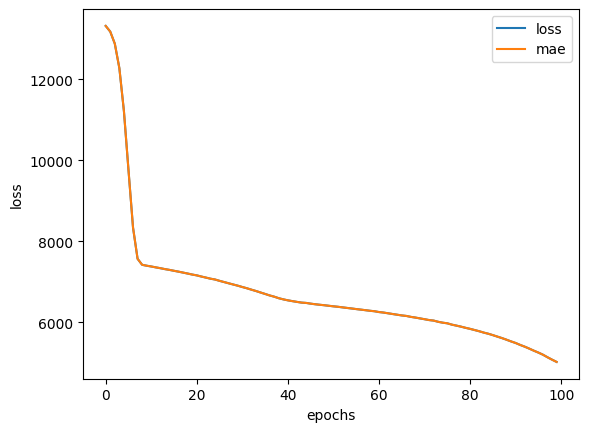

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Bundan, modelimizin kaybı (ve MAE) hala azalıyor gibi görünüyor (bizim durumumuzda, MAE ve kayıp aynı, dolayısıyla olay örgüsündeki çizgiler birbiriyle örtüşüyor).

Bunun bize söylediği şey, daha uzun süre eğitmeye çalışırsak kaybın düşebileceğidir.

🤔 Soru: Ne kadar süre antrenman yapmalısın?

Hangi sorun üzerinde çalıştığınıza bağlı. Bazen eğitim çok uzun sürmez, bazen beklediğinizden daha uzun sürer. Yaygın bir yöntem, model eğitiminizi çok uzun bir süre (örneğin 1000'lerce dönem) ayarlamaktır, ancak bunu bir EarlyStopping geri araması ile ayarlamaktır, böylece iyileştirmeyi durdurduğunda otomatik olarak durur. Bunu başka bir modülde göreceğiz.

Yukarıdakiyle aynı modeli biraz daha eğitelim. Bunu yapabiliriz ama tekrar uygun olduğunu söylemek.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 4ms/step - loss: 3500.1467 - mae: 3500.1467


(3500.146728515625, 3500.146728515625)

Fazladan 100 dönem için eğitimde hatada yaklaşık %10'luk bir düşüş görüyoruz.

Görsel nasıl görünüyor?

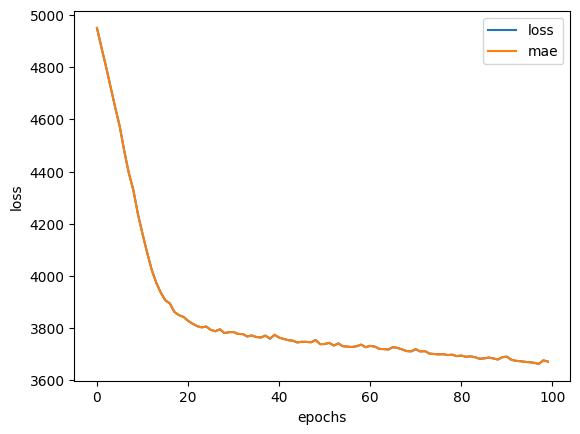

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

# Ön işleme verileri (normalleştirme ve standardizasyon)

Sinir ağlarıyla çalışırken yaygın bir uygulama, onlara aktardığınız tüm verilerin 0 ila 1 aralığında olduğundan emin olmaktır.

Bu uygulamaya normalleştirme denir (tüm değerlerin orijinal aralıklarından, örneğin 0 ile 100.000 arasında 0 ile 1 arasında olacak şekilde ölçeklendirilmesi).

Tüm verilerinizi birim varyansına ve 0 ortalamasına dönüştüren başka bir işlem çağrısı standardizasyonu vardır.

Bu iki uygulama genellikle bir ön işleme boru hattının parçasıdır (verilerinizi sinir ağlarıyla kullanıma hazırlamak için bir dizi işlev).

Bunu bilerek, verilerinizi bir sinir ağı için önceden işlemek için atacağınız önemli adımlardan bazıları şunlardır:

- Tüm verilerinizi sayılara dönüştürmek (bir sinir ağı dizeleri işleyemez).
- Verilerinizin doğru şekilde olduğundan emin olmak (giriş ve çıkış şekillerini doğrulamak).
- Özellik ölçekleme:
  - Verileri normalleştirme (tüm değerlerin 0 ile 1 arasında olduğundan emin olmak). Bu, minimum değerin çıkarılması ve ardından maksimum değer eksi minimum değere bölünmesiyle yapılır. Buna min-max ölçekleme de denir.
  - Standardizasyon (tüm değerlerin ortalamasının 0 ve varyansının 1 olduğundan emin olmak). Bu, hedef özellikten ortalama değerin çıkarılması ve ardından standart sapmaya bölünmesi ile yapılır.

Hangisini kullanmalısınız?

Sinir ağları ile 0 ile 1 arasındaki değerleri tercih etme eğiliminde olduklarından normalleştirmeyi tercih etme eğiliminde olacaksınız (bunu özellikle görüntü işleme ile göreceksiniz), ancak genellikle bir sinir ağının minimum özellik ölçeklemesi ile oldukça iyi performans gösterebileceğini göreceksiniz.

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-data

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

Get_dummies() kullanarak verilerimizi zaten sayılara dönüştürdük, bakalım nasıl normalleştireceğiz.

Get data ready (turn into tensors) üç adımı vardı);
* veriyi rakamlara dönüştürme
* tüm tensörlerin doğru şekillerde olduğundan emin olma
* Scala feature - Özellikleri ölçeklendirme (normalleştirme, standartlaştırma, nöral ağlar standarda meyillidir)

**Not**

Normalleştirme --> veri kümesindeki sayısal sütunlardaki değerleri ortak bir ölçekte değiştirmektir, değer aralığındaki farklılıkları bozmadan!

Normalleştirmenin amacı, veri kümesindeki sayısal sütunların değerlerini ortak bir ölçekte değiştirmektir. Orijinal dağılımı korurken tüm değerleri sıfır ile bir arasında dönüştürür.
Verilerimizin dağılımı sadece yayılmadır. Ne zaman kullanılır? --> Nöral ağlardaki temel skaladır. Fonksiyon adı **MinMaxScaler**

Standartlaştırma --> Ortalamayı çıkartır ve her değeri standart sapmaya böler. Fonksiyon adı **StandartScaler**. Ne zaman kullanılır? --> Bir özellik sütununu normal dağılıma yakın bir dağılıma sahip olmak için dönüştürmek içindir. Ancak özelliklerimizi ölçeklendirirsek veya özelliklerimizi standartlaştırırsak, bu aykırıların etkilerini azaltır.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Şimdi, daha önce olduğu gibi, sayısal olmayan sütunları sayılara dönüştürmemiz gerekiyor ve bu sefer farklı aralıklara sahip sayısal sütunları da normalleştireceğiz (hepsinin 0 ile 1 arasında olduğundan emin olmak için).

Bunu yapmak için Scikit-Learn'den birkaç ders kullanacağız:
- Make_column_transformer - aşağıdaki dönüşümler için çok adımlı bir veri ön işleme işlevi oluşturun:
  - MinMaxScaler - tüm sayısal sütunların normalleştirildiğinden emin olun (0 ile 1 arasında).
  - OneHotEncoder - bir sıcak kodlayıcı sayısal olmayan sütunları.

  https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

* Sütunları dönüştürmek için column transformer kullanıldı.
* make_column_transformer: Verilen Transformatörlerden bir sütun transformatörü inşa etmekte kullanılır.
* handle_unknown="ignore" --> bilmediği kolon varsa görmezden gelmesi içindir.
* Veri çerçevesini yukarıda yeniden içeri aktardığımız için x ve y değerlerini oluşturduk.
* Modelin bazı eğitim verileri üzerinde eğitmek ve görmediği bazı veriler üzerinde değerlendirmek isteriz bunun için train ve test olarak bölündü...
* Bir tür sütun transformatörüne sahip olduğunuzda, eğitim verilerinize sığdırın ve ardından test verilerinizi dönüştürmek için bu uygun sütun transformatörünü kullanın, çünkü aksi takdirde, bunu ayrı ayrı yaparsanız, test verileri veridir.
Model daha önce hiç görülmemiştir.
Yani temelde gelecekten gelen veriler. Yani eğitim veri setimizi test veri setinden gelen bilgilerle dönüştürüyorsak, bu almak gibi
gelecekten gelen bilgi ve şu anda sahip olduğumuz verileri değiştirmektir.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Şimdi normalleştirdik ve tek sıcak kodladık, verilerimiz şimdi nasıl görünüyor?

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

One hot ile daha fazla sütun eklendiği için, 0-1 konusu, shape farklı oldu.

In [ ]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

Verilerimiz normalleştirilmiş ve sayısal, modelleyelim.

Insurance_model_2 ile aynı modeli kullanacağız.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

Normalleştirilmiş test setinde modeli değerlendirelim.

Üzerinde eğitildiği aynı tür veri üzerinde değerlendirmemiz gerekiyor.
Yani bu da önemli bir nokta, çünkü normalleştirilmiş veriler üzerinde denedik.
Normalleştirilmiş veri kayması üzerinde değerlendirmeli ve girmeliyiz.

In [ ]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.8787 - mae: 3171.8787


Ve son olarak, insurance_model_2 (normalleştirilmemiş verilerle eğitilmiş) ve insurance_model_3'ten (normalleştirilmiş veriler üzerinde eğitilmiş) elde edilen sonuçları karşılaştıralım.

In [ ]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3500.146728515625, 3171.878662109375)

Ancak özelliklerimizi normalleştirdiğimizde, modellerimiz daha hızlı yakınsama eğilimindedir.

Yani, yine, verileri normalleştirmek iyileştirilmiş sonuçları garanti etmez, ancak denemeye değer bir şey çünkü
uygulamanın ne kadar kolay olduğu hakkında.
Ve aslında, ileride yaptığımız ön işleme kodumuzun çoğunda normalleştirme oluşturulacaktır.

Bundan, verilerin normalleştirilmesinin, aynı modeli kullanarak verileri normalleştirmemekten %10 daha az hata ile sonuçlandığını görebiliriz.

Bu, normalleştirmenin ana faydalarından biridir: daha hızlı yakınsama süresi (modelinizin daha hızlı daha iyi sonuçlara ulaştığını söylemenin süslü bir yolu).

Insurance_model_2, eğitimi daha uzun süre bıraksaydık, sonunda insurance_model_3 ile aynı sonuçları elde etmiş olabilir.

Ayrıca, modellerin mimarilerini değiştirirsek sonuçlar değişebilir, örn. katman başına daha fazla gizli birim veya daha fazla katman.

Ancak sinir ağı uygulayıcıları olarak asıl amacımız deneyler arasındaki süreyi azaltmak olduğundan, daha erken daha iyi sonuçlar almamıza yardımcı olan her şey bir artıdır.

Ekstra müfredat

Bu dizüstü bilgisayarla ilgili ekstra materyaller arıyorsanız, aşağıdakilere göz atacağım:

MIT giriş derin öğrenme dersi 1 - çalıştırdığımız tüm kodun arkasında neler olup bittiğine dair harika bir genel bakış sunar.

https://www.youtube.com/watch?v=njKP3FqW3Sk

Okuma: Michael Nielson'ın Sinir Ağları ve Derin Öğrenme Bölüm 1'in 1 saati - sinir ağlarının arkasındaki sezginin derinlemesine ve uygulamalı harika bir örneği.

http://neuralnetworksanddeeplearning.com/chap1.html

TensorFlow ile regresyon modellemenizi uygulamak için, Lion Bridge'in veri kümeleri koleksiyonuna veya Kaggle'nın veri kümelerine bakmanızı, ilginizi çeken bir regresyon veri kümesi bulmanızı ve modellemeye çalışmanızı da tavsiye ederim.

https://www.kaggle.com/datasets